## 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

MetaData = pd.read_csv('all_training.csv', encoding='utf8')
MetaData

,id,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,...,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
0,A00345_2020-03-25,1,82.0,2.09,NaN,1.150,95.0,40.0,78.0,26.0,...,9.5,2.9,0.5,6.40,1.20,0.8,0.3,0.0,1.0,0
1,A00791_2020-03-19,1,51.0,1.97,237.0,0.970,54.0,98.0,98.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
2,A00741_2020-03-04,1,58.0,2.11,NaN,1.000,80.0,147.0,106.0,41.0,...,7.3,0.3,0.1,5.45,0.75,0.5,0.0,0.0,1.0,0
3,A00605_2020-04-15,0,82.0,2.27,138.0,0.755,123.5,176.5,106.0,114.0,...,9.5,1.7,0.9,3.60,2.60,0.7,0.1,0.1,0.5,0
4,A00417_2020-02-24,1,79.0,2.07,73.0,1.810,62.0,36.5,96.0,28.0,...,10.0,8.5,0.5,0.40,0.50,0.1,0.1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,49,0,NaN,2.38,40.0,0.800,68.0,9.0,128.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1732,50,0,NaN,2.36,NaN,0.960,79.0,35.0,107.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1733,51,1,NaN,2.28,NaN,1.420,NaN,NaN,136.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1734,52,1,NaN,2.40,124.0,0.950,48.0,44.0,95.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [2]:
# MetaData.hist(alpha=0.6, layout=(6,6), figsize=(12, 8), bins=10) 
# plt.tight_layout()
# plt.show()

## 2. Data Preprocessing

### 移除特徵值缺失過多的資料

In [3]:
# 計算每"筆"資料的特徵值缺失，刪除缺失超過30個欄位的資料
drop_index = MetaData[MetaData.isna().sum(axis=1)>30].index

MetaData = MetaData.drop(index=drop_index)

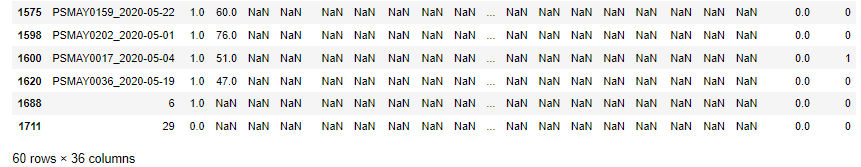

+ 發現約有60筆資料完全沒有血液相關的特徵值，刪除這些資料避免影響預測預測結果

### 移除缺失值過多的特徵欄位

In [4]:
# 計算每個特徵欄位的缺失值比例
missing_percentage = round(MetaData.isna().sum()/len(MetaData)*100,2)
print('Missing Rate')
missing_percentage.sort_values(ascending=False)

Missing Rate


CK         58.00
UREA       36.75
ALP        24.70
GGT        22.43
EOT        18.02
MO         18.02
EO         18.02
BA         18.02
NET        18.02
LYT        18.02
MOT        18.02
BAT        18.02
LY         18.02
NE         18.02
LDH        14.50
Age         3.10
AST         2.27
GLU         2.27
PCR         2.21
ALT         2.15
CA          1.97
KAL         1.19
CREA        0.84
NAT         0.78
HGB         0.18
PLT1        0.18
MCHC        0.18
MCH         0.18
MCV         0.18
HCT         0.18
RBC         0.18
WBC         0.18
Suspect     0.00
id          0.00
Sex         0.00
target      0.00
dtype: float64

In [5]:
MetaData = MetaData.drop(['id','CK','UREA'], axis=1)


+ 移除用不到的欄位以及缺失值比例過高的欄位屬性

### Exploratory Data Analysis(EDA)

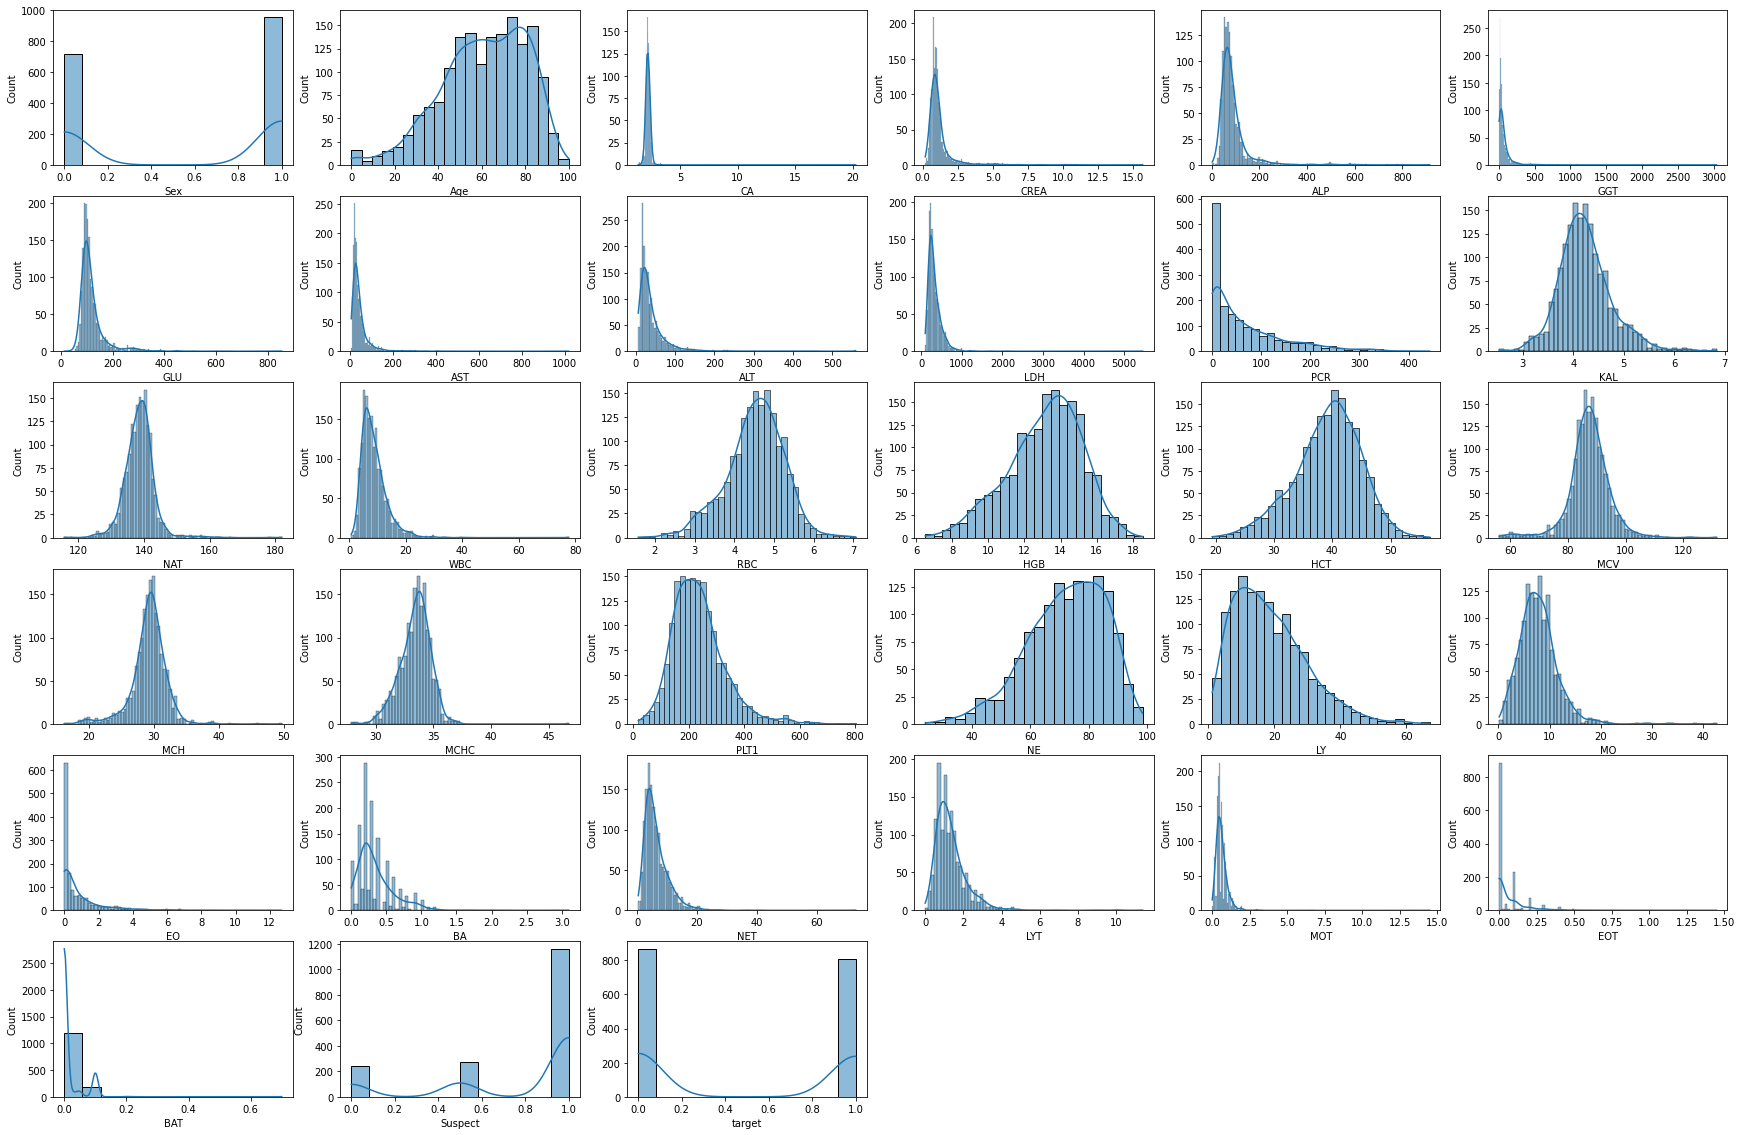

In [6]:
fig, axes = plt.subplots(nrows=6,ncols=6, figsize=(24, 24))
fig.set_size_inches(30, 20)

# unpack all the axes subplots
axe = axes.flat
# axe = axes.ravel()
for i, col in enumerate(MetaData.columns):
    sns.histplot(MetaData[col][:],ax=axe[i], kde=True)

for axe in axe:
    ## check if something was plotted 
    if not axe.has_data():
        fig.delaxes(axe) ## delete if nothing is plotted in the axes obj

+ 觀察各個特徵的值及數量的分布情形
+ 可以發現各個特徵間的值域有明顯的差距，可能需要Feature Scaling

### 建立訓練資料

In [7]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(MetaData, stratify=MetaData['target'], test_size=0.2, shuffle=True, random_state=2022)

In [8]:
print(f"raw data percentage :\n{MetaData['target'].value_counts(normalize=True)*100}")
print(f"\ntrain percentage :\n{train_df['target'].value_counts(normalize=True) * 100}")
print(f"\ntest percentage :\n{test_df['target'].value_counts(normalize=True) * 100}")

raw data percentage :
0    51.73031
1    48.26969
Name: target, dtype: float64

train percentage :
0    51.716418
1    48.283582
Name: target, dtype: float64

test percentage :
0    51.785714
1    48.214286
Name: target, dtype: float64


### Missing Value Complement


+ Median Imputation

In [9]:
# #填缺失值: Numeric -> 填中位數(Median)
# train_median = {} 
# def missing_value_complement (column_name):
#     median = train_df[column_name].median() ##calculate from train set
#     train_median[column_name] = median 
    
#     train_df[column_name] = train_df[column_name].fillna(median)
#     test_df[column_name] = test_df[column_name].fillna(median)

In [10]:
# for col in train_df.columns:
#     missing_value_complement(col)
# train_df.isna().sum()

+ KNN Imputation

In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputer.fit(train_df) #calculate from train set

col_name = train_df.columns
imputated = imputer.transform(train_df)
train_df = pd.DataFrame(imputated, columns=col_name)
imputated = imputer.transform(test_df)
test_df = pd.DataFrame(imputated, columns=col_name)
train_df.isna().sum()

Sex        0
Age        0
CA         0
CREA       0
ALP        0
GGT        0
GLU        0
AST        0
ALT        0
LDH        0
PCR        0
KAL        0
NAT        0
WBC        0
RBC        0
HGB        0
HCT        0
MCV        0
MCH        0
MCHC       0
PLT1       0
NE         0
LY         0
MO         0
EO         0
BA         0
NET        0
LYT        0
MOT        0
EOT        0
BAT        0
Suspect    0
target     0
dtype: int64

## Correlation

<AxesSubplot:>

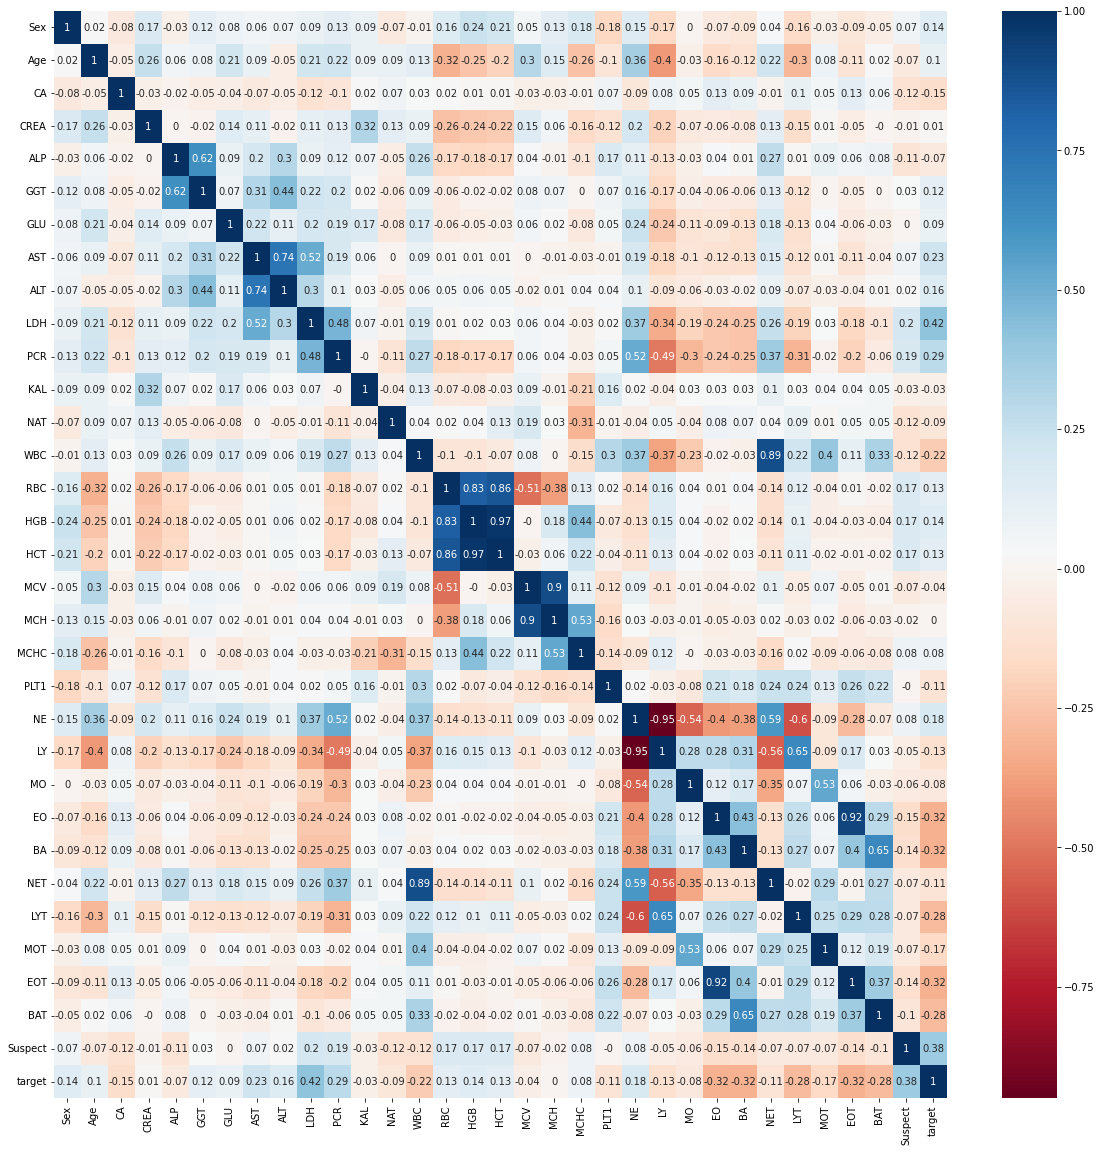

In [12]:
# 用熱度圖視覺化欄位間的 相關性(Correlation) 
plt.figure(figsize=(20,20))
sns.heatmap(round(train_df.corr(),2), annot=True, cmap='RdBu')

+ 可以發現"確診"與"LDH"、"Suspect"的相關性最為明顯，"EO"、"BA"、"EOT"相關性大於0.3

## 4.Model Building

In [13]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

x_train = train_df.drop(['target'], axis=1)
y_train = train_df['target']
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=100)
#clf = RandomForestClassifier(max_depth=7, n_estimators=27)
np.average(cross_val_score(clf_dt, x_train, y_train, cv=10))

0.7686567164179104

In [14]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100)
clf_dt.fit(x_train ,y_train)

# selector = RFE(clf, n_features_to_select=20, step=2) #######
# selector = selector.fit(train_data, train_label)

# train_data = selector.transform(train_data)
# test_data = selector.transform(test_data) #####
# train_data

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=100)

In [15]:
x_test = test_df.drop(['target'], axis=1)
y_test = test_df['target']
predicted = clf_dt.predict(x_test)
predicted_prob = clf_dt.predict_proba(x_test)

In [16]:
classes = clf_dt.classes_
y_test_array = pd.get_dummies(y_test).values #.value -> arra

Accuracy: 0.76
Auc: 0.81
Detail:
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76       174
         1.0       0.74      0.75      0.75       162

    accuracy                           0.76       336
   macro avg       0.76      0.76      0.76       336
weighted avg       0.76      0.76      0.76       336



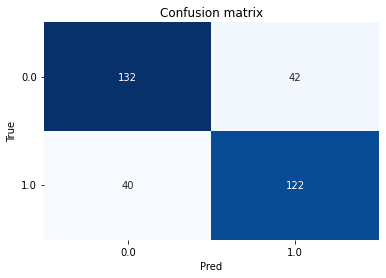

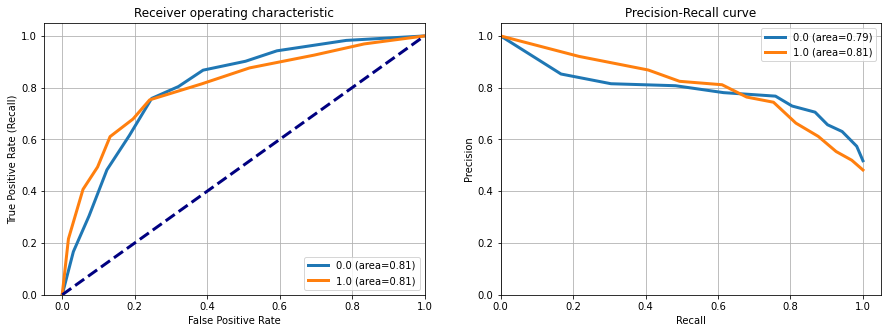

In [17]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test_array, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(acc,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--') # 畫虛線(acc=0.5)
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],                 # 坐標軸顯示範圍
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")                              # 顯示參考圖例在右下角
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

classes: [0. 1.]


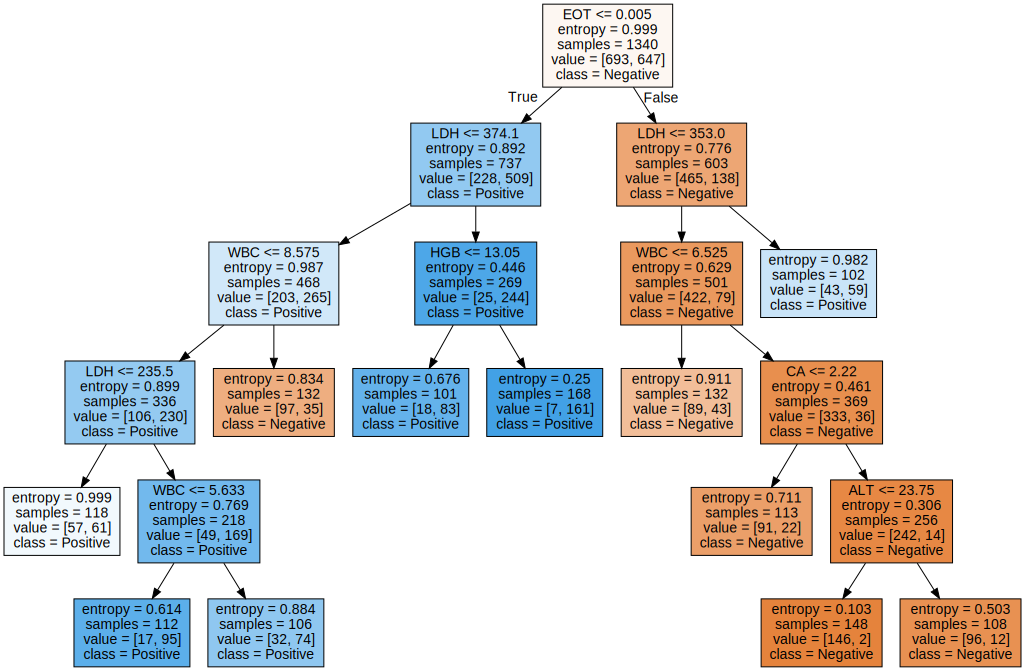

In [18]:
import graphviz

print('classes:', clf_dt.classes_) #

# Visualize Decition Tree
dot_data = tree.export_graphviz(clf_dt, feature_names=x_train.columns,class_names=['Negative','Positive'], out_file=None, filled=True) 
graph = graphviz.Source(dot_data) 
graph.render("Decision Tree") 
graph

In [19]:
# 模型的判斷依據重要程度
d = {'Features': x_train.columns.values, 'importances':clf_dt.feature_importances_}
df = pd.DataFrame(d).sort_values(['importances'], axis=0, ascending=False)
df

,Features,importances
29,EOT,0.455840
9,LDH,0.310221
13,WBC,0.169918
2,CA,0.024573
15,HGB,0.020856
8,ALT,0.018592
24,EO,0.000000
21,NE,0.000000
22,LY,0.000000
23,MO,0.000000


## 5. Model Comparison

In [20]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [21]:
import time
def model_predict(train_data, test_data, train_label, classifier, with_rfe=False, with_pca=False, return_classifier = False):
    
    start = time.time()

    if(with_rfe):
        classifier.fit(train_data, train_label) #train for select importance featrue for moedel
        d = {'Features': x_train.columns.values, 'importances':clf_dt.feature_importances_}
        df = pd.DataFrame(d).sort_values(['importances'], axis=0, ascending=False)
        selector = RFE(classifier, n_features_to_select=20) #######
        selector = selector.fit(train_data, train_label)
        train_data = selector.transform(train_data)
        test_data = selector.transform(test_data) 
    if(with_pca):
        pca = compress=PCA(n_components=20)
        pca.fit(train_data, train_label)
        train_data = pca.transform(train_data)
        test_data = pca.transform(test_data) 
        
    
    classifier.fit(train_data, train_label) # train with selected feature
    
    ## test
    X_test = test_data
    predicted = classifier.predict(X_test)
    predicted_prob = classifier.predict_proba(X_test)
    
    end = time.time()
    print(f"time costing: {end - start}")

    if return_classifier:
        return predicted, predicted_prob, classifier       
    else:
        return predicted, predicted_prob

In [22]:
def evaluate(true, predicted, predicted_prob):
    classes = np.unique(true)
    true_array = pd.get_dummies(true, drop_first=False).values
    #print(classes)
    
    ## Accuracy, Precision, Recall
    Accuracy = metrics.accuracy_score(true, predicted)
    AUC = metrics.roc_auc_score(true_array, predicted_prob, 
                                multi_class="ovr")
    
    print("Accuracy:",  round(Accuracy,2))
    print("Auc:", round(AUC,2))
    print("Detail:")
    print(metrics.classification_report(true, predicted))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(true, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

    ## Plot roc
    roc_auc_dict = {}
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(true_array[:,i],  
                               predicted_prob[:,i])
        roc_auc = metrics.auc(fpr, tpr)
        ax[0].plot(fpr, tpr, lw=3, 
                  label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
                   )
        roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
        
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--') # 畫虛線(acc=0.5)
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],                 # 坐標軸顯示範圍
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")     
    ax[0].legend(loc="lower right")                              # 顯示參考圖例在右下角
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     true_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

    return Accuracy, AUC, roc_auc_dict

In [23]:
# Define
train_data = x_train
train_label = y_train
test_data = x_test
test_label = y_test

In [24]:
# Describe data info
round(train_data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Sex,1340.0,0.57,0.50,0.00,0.00,1.00,1.00,1.00
Age,1340.0,60.88,19.40,0.00,48.00,62.00,77.00,100.00
CA,1340.0,2.22,0.53,1.36,2.09,2.20,2.31,20.25
CREA,1340.0,1.16,0.97,0.20,0.75,0.94,1.20,15.70
ALP,1340.0,86.58,62.72,1.76,58.00,71.40,91.93,780.50
GGT,1340.0,59.23,82.45,4.00,21.00,34.80,65.12,1098.00
GLU,1340.0,119.67,59.64,13.00,91.00,105.00,126.00,855.00
AST,1340.0,45.69,51.80,8.00,23.00,32.00,50.00,1018.50
ALT,1340.0,39.16,43.67,6.00,18.00,27.00,44.00,559.50
LDH,1340.0,320.34,150.94,98.00,219.88,278.00,382.00,1690.50


### Feature Scaling

In [25]:
# # Standarization -> 將所有特徵都拉到平均數為0，標準差為1的基準上 
# from sklearn.preprocessing import StandardScaler

# col_name = train_data.columns
# standard = StandardScaler().fit(train_data) # calculate from train data
# scaled_data = standard.transform(train_data)
# train_data = pd.DataFrame(scaled_data, columns=col_name)
# scaled_data = standard.transform(test_data) 
# test_data = pd.DataFrame(scaled_data, columns=col_name)
# round(train_data.describe(),2).T

In [26]:
# Rescaling -> 讓所有特徵資料都縮放到[0,1]
from sklearn.preprocessing import MinMaxScaler

col_name = train_data.columns
rescaling = MinMaxScaler().fit(train_data) # calculate from train data
scaled_data = rescaling.transform(train_data)
train_data = pd.DataFrame(scaled_data, columns=col_name)
scaled_data = rescaling.transform(test_data) 
test_data = pd.DataFrame(scaled_data, columns=col_name)
round(train_data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Sex,1340.0,0.57,0.50,0.0,0.00,1.00,1.00,1.0
Age,1340.0,0.61,0.19,0.0,0.48,0.62,0.77,1.0
CA,1340.0,0.05,0.03,0.0,0.04,0.04,0.05,1.0
CREA,1340.0,0.06,0.06,0.0,0.04,0.05,0.06,1.0
ALP,1340.0,0.11,0.08,0.0,0.07,0.09,0.12,1.0
GGT,1340.0,0.05,0.08,0.0,0.02,0.03,0.06,1.0
GLU,1340.0,0.13,0.07,0.0,0.09,0.11,0.13,1.0
AST,1340.0,0.04,0.05,0.0,0.01,0.02,0.04,1.0
ALT,1340.0,0.06,0.08,0.0,0.02,0.04,0.07,1.0
LDH,1340.0,0.14,0.09,0.0,0.08,0.11,0.18,1.0


In [27]:
# from sklearn.preprocessing import Normalizer

# col_name = train_data.columns
# normalize = Normalizer().fit(train_data) # calculate from train data
# scaled_data = normalize.transform(train_data)
# train_data = pd.DataFrame(scaled_data, columns=col_name)
# scaled_data = normalize.transform(test_data) 
# test_data = pd.DataFrame(scaled_data, columns=col_name)
# round(train_data.describe(),2).T

In [28]:
## save model result
result_df = pd.DataFrame(columns=['model_type', 'Accuracy', 'AUC'])
roc_auc_all = {}

+ SVM Classifier

model type: SVM
time costing: 0.15199995040893555
Accuracy: 0.77
Auc: 0.84
Detail:
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       174
         1.0       0.75      0.79      0.77       162

    accuracy                           0.77       336
   macro avg       0.77      0.77      0.77       336
weighted avg       0.77      0.77      0.77       336



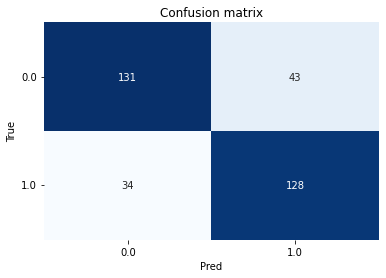

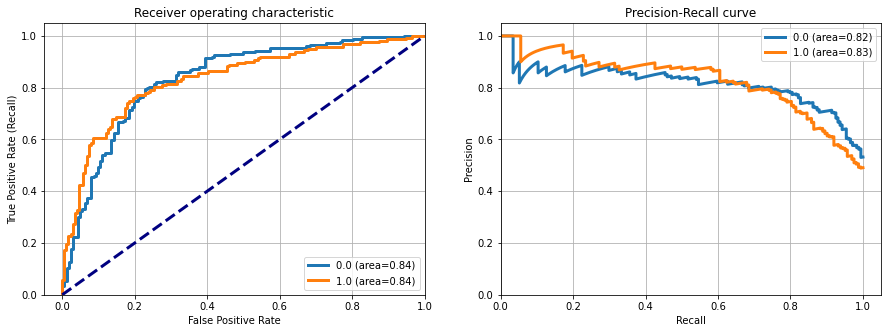

In [29]:
from sklearn import svm

clf_svc = svm.SVC(probability=True)
model_type = "SVM"
print(f"model type: {model_type}")
# train model
pred , pred_pro= model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_svc)
# evaluation
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# add result to result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc


+ Logistic Regression

model type: Logistic Regression
time costing: 0.021999597549438477
Accuracy: 0.79
Auc: 0.82
Detail:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       174
         1.0       0.77      0.80      0.78       162

    accuracy                           0.79       336
   macro avg       0.79      0.79      0.79       336
weighted avg       0.79      0.79      0.79       336



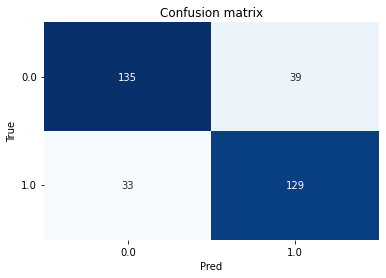

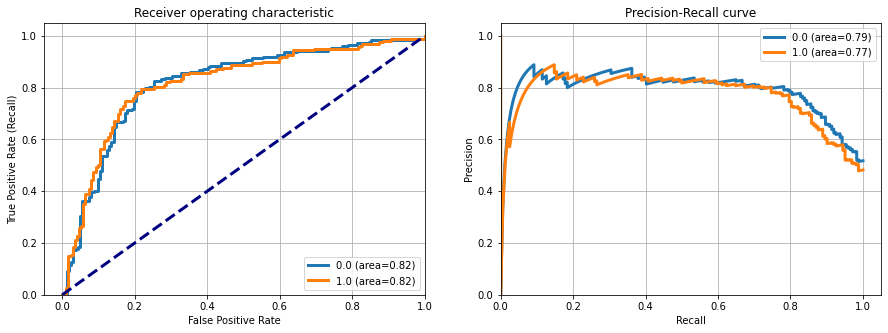

In [30]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model_type = "Logistic Regression"
print(f"model type: {model_type}")
# train model
pred , pred_pro= model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_lr)
# evaluation
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# add result to result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc

+ Random Forest

model type: Random Forest
time costing: 0.34414243698120117
Accuracy: 0.79
Auc: 0.86
Detail:
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       174
         1.0       0.81      0.75      0.78       162

    accuracy                           0.79       336
   macro avg       0.80      0.79      0.79       336
weighted avg       0.80      0.79      0.79       336



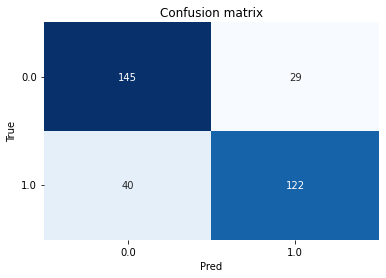

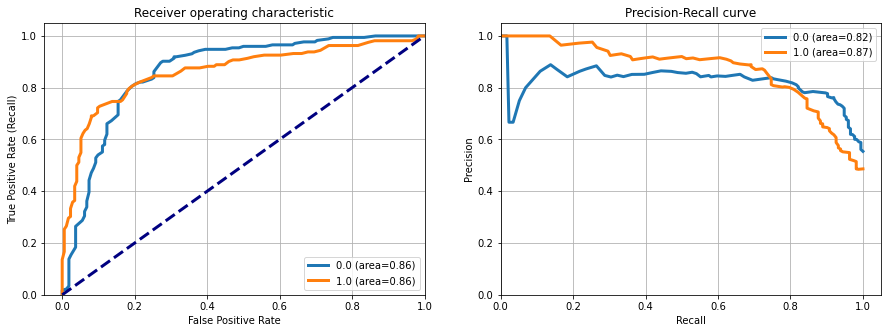

In [31]:
from sklearn.ensemble import RandomForestClassifier

#clf_rf  = RandomForestClassifier(max_depth=10, n_estimators=37) #(25,39)
clf_rf = RandomForestClassifier()
model_type = "Random Forest"
print(f"model type: {model_type}")
# train model
pred , pred_pro = model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_rf)
# evaluation
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# add result to result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc


+ AdaBoost

model type: AdaBoost
time costing: 0.20502758026123047
Accuracy: 0.75
Auc: 0.83
Detail:
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       174
         1.0       0.75      0.72      0.74       162

    accuracy                           0.75       336
   macro avg       0.75      0.75      0.75       336
weighted avg       0.75      0.75      0.75       336



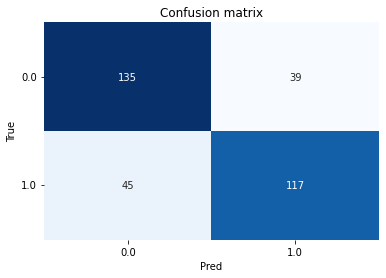

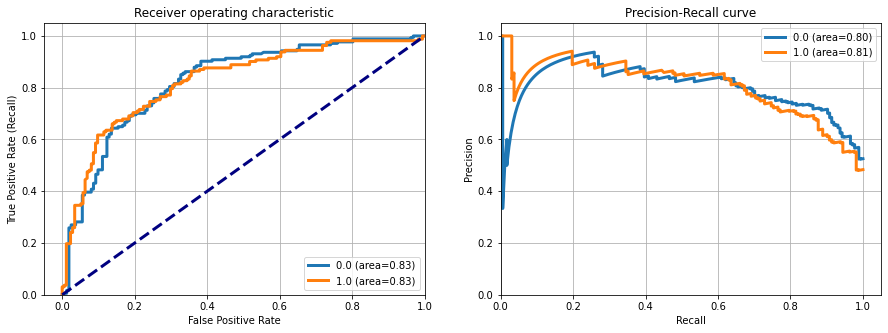

In [32]:
from sklearn.ensemble import AdaBoostClassifier
clf_ab = AdaBoostClassifier()

model_type = "AdaBoost"
print(f"model type: {model_type}")
# train model
pred , pred_pro= model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_ab)
# evaluation
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# add result to result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc

+ GradientBoost

model type: GradientBoost
time costing: 0.7258458137512207
Accuracy: 0.79
Auc: 0.84
Detail:
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       174
         1.0       0.81      0.74      0.77       162

    accuracy                           0.79       336
   macro avg       0.79      0.79      0.79       336
weighted avg       0.79      0.79      0.79       336



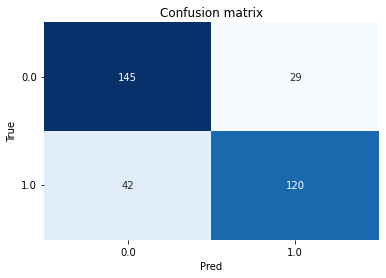

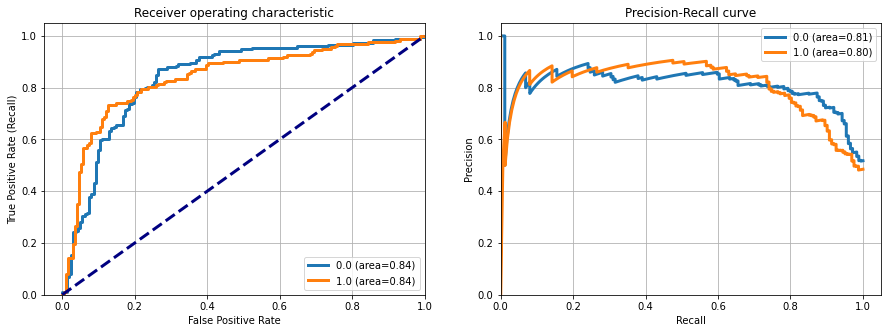

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier()

model_type = "GradientBoost"
print(f"model type: {model_type}")
# train model
pred , pred_pro= model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_gb)
# evaluation
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# add result to result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc

+ XGBoost

model type: XGBoost
time costing: 0.2906224727630615
Accuracy: 0.81
Auc: 0.85
Detail:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       174
         1.0       0.81      0.78      0.80       162

    accuracy                           0.81       336
   macro avg       0.81      0.81      0.81       336
weighted avg       0.81      0.81      0.81       336



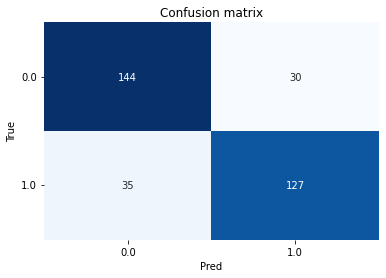

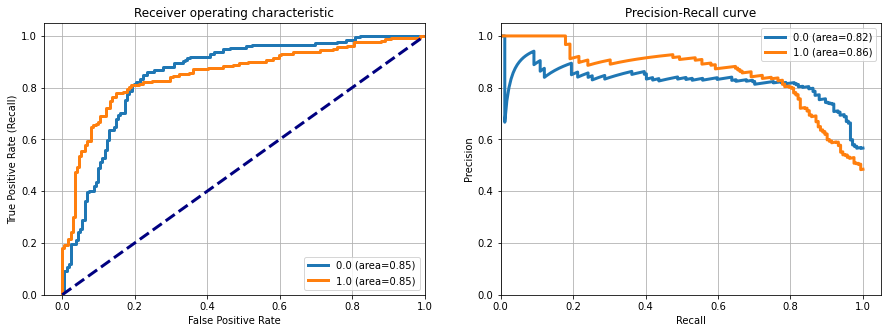

In [34]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(num_iterations=1000, subsample=0.5,sampling_method='uniform', object='binary:logistic',
                        val_metric='auc', eta=0.01, gamma=0.3, reg_alpha=0.3, reg_lambda=0.7,
                        use_label_encoder=False, verbosity=0, # to ignore userwaning
                        )
# {'n_estimators': 1600, 'max_depth': 90, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
model_type = "XGBoost"
print(f"model type: {model_type}")
# train model
pred , pred_pro= model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_xgb , with_rfe=False)
# evaluation
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# add result to result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc

+ Multi-layer Perceptron(MLP)

model type: MLP
time costing: 6.2444047927856445
Accuracy: 0.8
Auc: 0.85
Detail:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       174
         1.0       0.79      0.80      0.79       162

    accuracy                           0.80       336
   macro avg       0.80      0.80      0.80       336
weighted avg       0.80      0.80      0.80       336



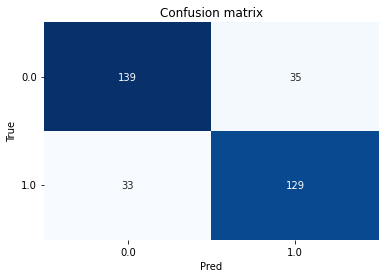

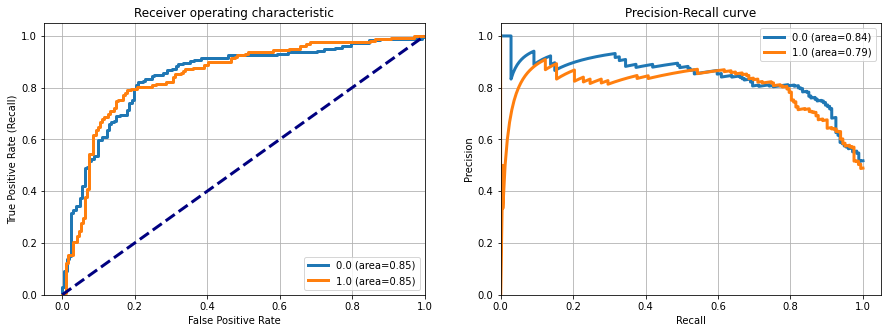

In [35]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', 
                        alpha=1e-4, max_iter=10000,
                        early_stopping=False, shuffle=True, verbose=False)
model_type = "MLP"
print(f"model type: {model_type}")
# 訓練模型
pred , pred_pro= model_predict(train_data.values, test_data.values, train_label,
                                classifier = clf_mlp)
# 查看模型訓練結果
accuracy, auc, roc_auc = evaluate(test_label, pred, pred_pro)
# 把結果加進result_df
result = pd.DataFrame(data = [[model_type, accuracy, auc]], columns=['model_type', 'Accuracy', 'AUC'])
result_df = pd.concat([result_df, result], axis=0)
roc_auc_all[model_type] = roc_auc

In [36]:
result_df.sort_values(by=['Accuracy'], ascending=False)

,model_type,Accuracy,AUC
0,XGBoost,0.806548,0.853519
0,MLP,0.797619,0.84653
0,Random Forest,0.794643,0.863523
0,GradientBoost,0.78869,0.841032
0,Logistic Regression,0.785714,0.819107
0,SVM,0.770833,0.835001
0,AdaBoost,0.75,0.825617


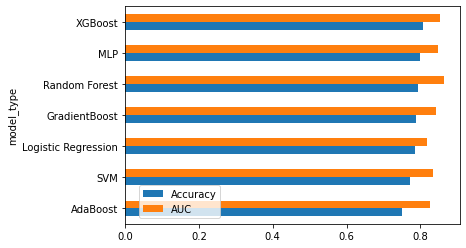

In [37]:
result_df.sort_values(by=['Accuracy'], ascending=True) \
    .plot.barh(x="model_type", y=["Accuracy", "AUC"])
plt.legend(bbox_to_anchor=(0.3,0.2))

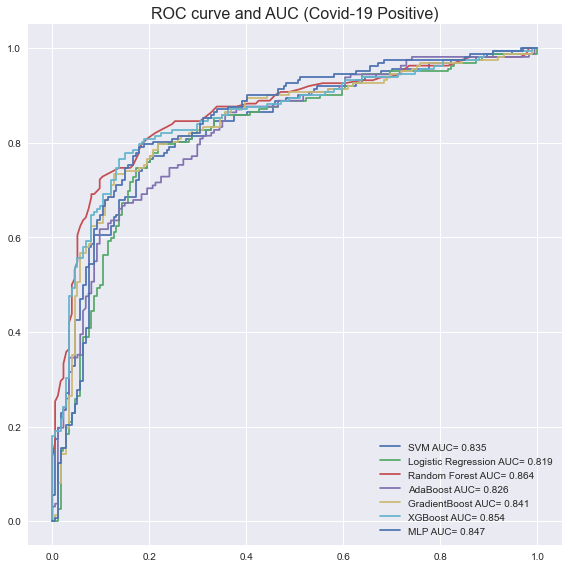

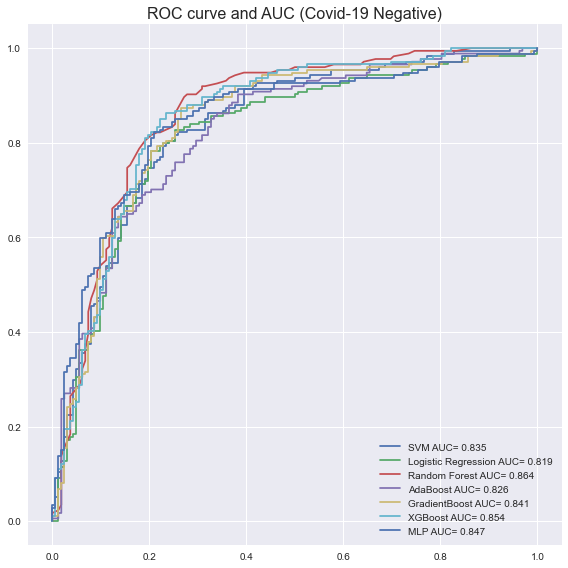

In [38]:
plt.style.use('seaborn')    

l = [1,0]
for label in l:
    plt.figure(figsize =(8, 8))
    for k, v in roc_auc_all.items():
        fpr = roc_auc_all[k][label]["fpr"]
        tpr = roc_auc_all[k][label]["tpr"]
        roc_auc = roc_auc_all[k][label]["roc_auc"]
        plt.plot(fpr,tpr,label= k + " AUC= %0.3f" % roc_auc)
        plt.title('ROC curve and AUC ('+  ('Covid-19 Positive' if label==1 else 'Covid-19 Negative') +')', size = 16)   
    
    plt.legend(loc=0)
    plt.tight_layout()

### Grid Search
+ find the best hyperparameter

{'max_depth': 14, 'n_estimators': 42}
0.8395522388059702


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

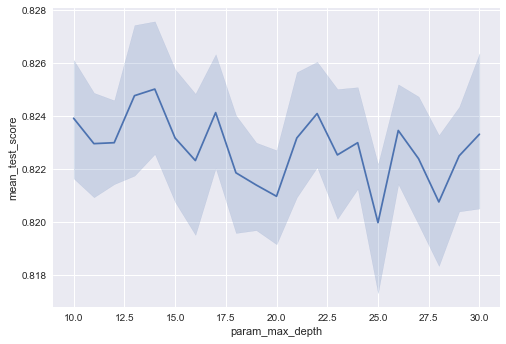

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(10, 31),      #[10, 11, 12, ..., 30]
    'n_estimators': range(30, 51)  #[30, 31, 32, ..., 50]
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10)
search.fit(x_train, y_train)
result = pd.DataFrame(search.cv_results_)
print(search.best_params_)
print(search.best_score_)
sns.lineplot(data=result, x="param_max_depth", y="mean_test_score")


e:\pycharmprojects\data_mining\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'n_estimators': 400, 'max_depth': 30, 'learning_rate': 0.09, 'colsample_bytree': 0.4}
0.8395522388059702


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

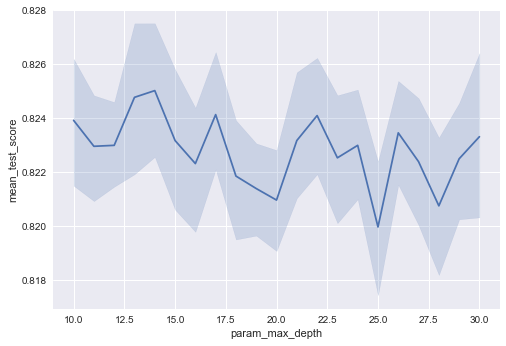

In [40]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
#max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth = range(10,50)
#max_depth.append(None)
learning_rate=[round(float(x),2) for x in np.linspace(start=0.01, stop=0.2, num=10)]
colsample_bytree =[round(float(x),2) for x in np.linspace(start=0.1, stop=1, num=10)]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bytree': colsample_bytree}
clf = XGBClassifier(sampling_method='uniform', object='binary:logistic',val_metric='auc', use_label_encoder=False)
random_search = RandomizedSearchCV(estimator = clf, param_distributions=random_grid,
                                   n_iter=100, cv=3, random_state=2022, n_jobs=-1)

random_search.fit(x_train,y_train)
result = pd.DataFrame(search.cv_results_)
print(random_search.best_params_)
print(search.best_score_)
sns.lineplot(data=result, x="param_max_depth", y="mean_test_score")